# Question 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data.csv', header=12)

In [4]:
filter_1 = data['D (Mpc)'][:1500]

In [5]:
final_data = filter_1[filter_1 < 4]

In [6]:
n = len(final_data)
final_data

27      0.916
28      0.929
29      0.951
30      0.955
31      0.964
        ...  
1448    0.863
1449    0.752
1450    0.813
1451    0.700
1452    0.382
Name: D (Mpc), Length: 170, dtype: float64

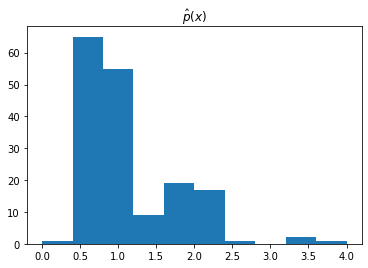

In [7]:
plt.hist(final_data, bins=10, range=(0, 4))
title = r'\hat{p}(x)'
plt.title('$%s$'%title)
plt.show()

In [8]:
counts, bins = np.histogram(final_data, bins=10, range=(0, 4))

In [9]:
h = bins[1] - bins[0]

In [10]:
p = counts / (h * n)

In [11]:
p

array([0.01470588, 0.95588235, 0.80882353, 0.13235294, 0.27941176,
       0.25      , 0.01470588, 0.        , 0.02941176, 0.01470588])

In [12]:
estimator = []
bin_widths = []
for bin_count in range(1, 1001):
    counts, bins = np.histogram(final_data, bins=bin_count, range=(0, 4))
    bin_width = bins[1] - bins[0]
    estimate = (1/(n**2 * bin_width)) * np.sum(counts**2)
    estimate -= (2/(n*(n-1)*bin_width)) * np.sum(counts**2 - counts)
    estimator.append(estimate)
    bin_widths.append(bin_width)

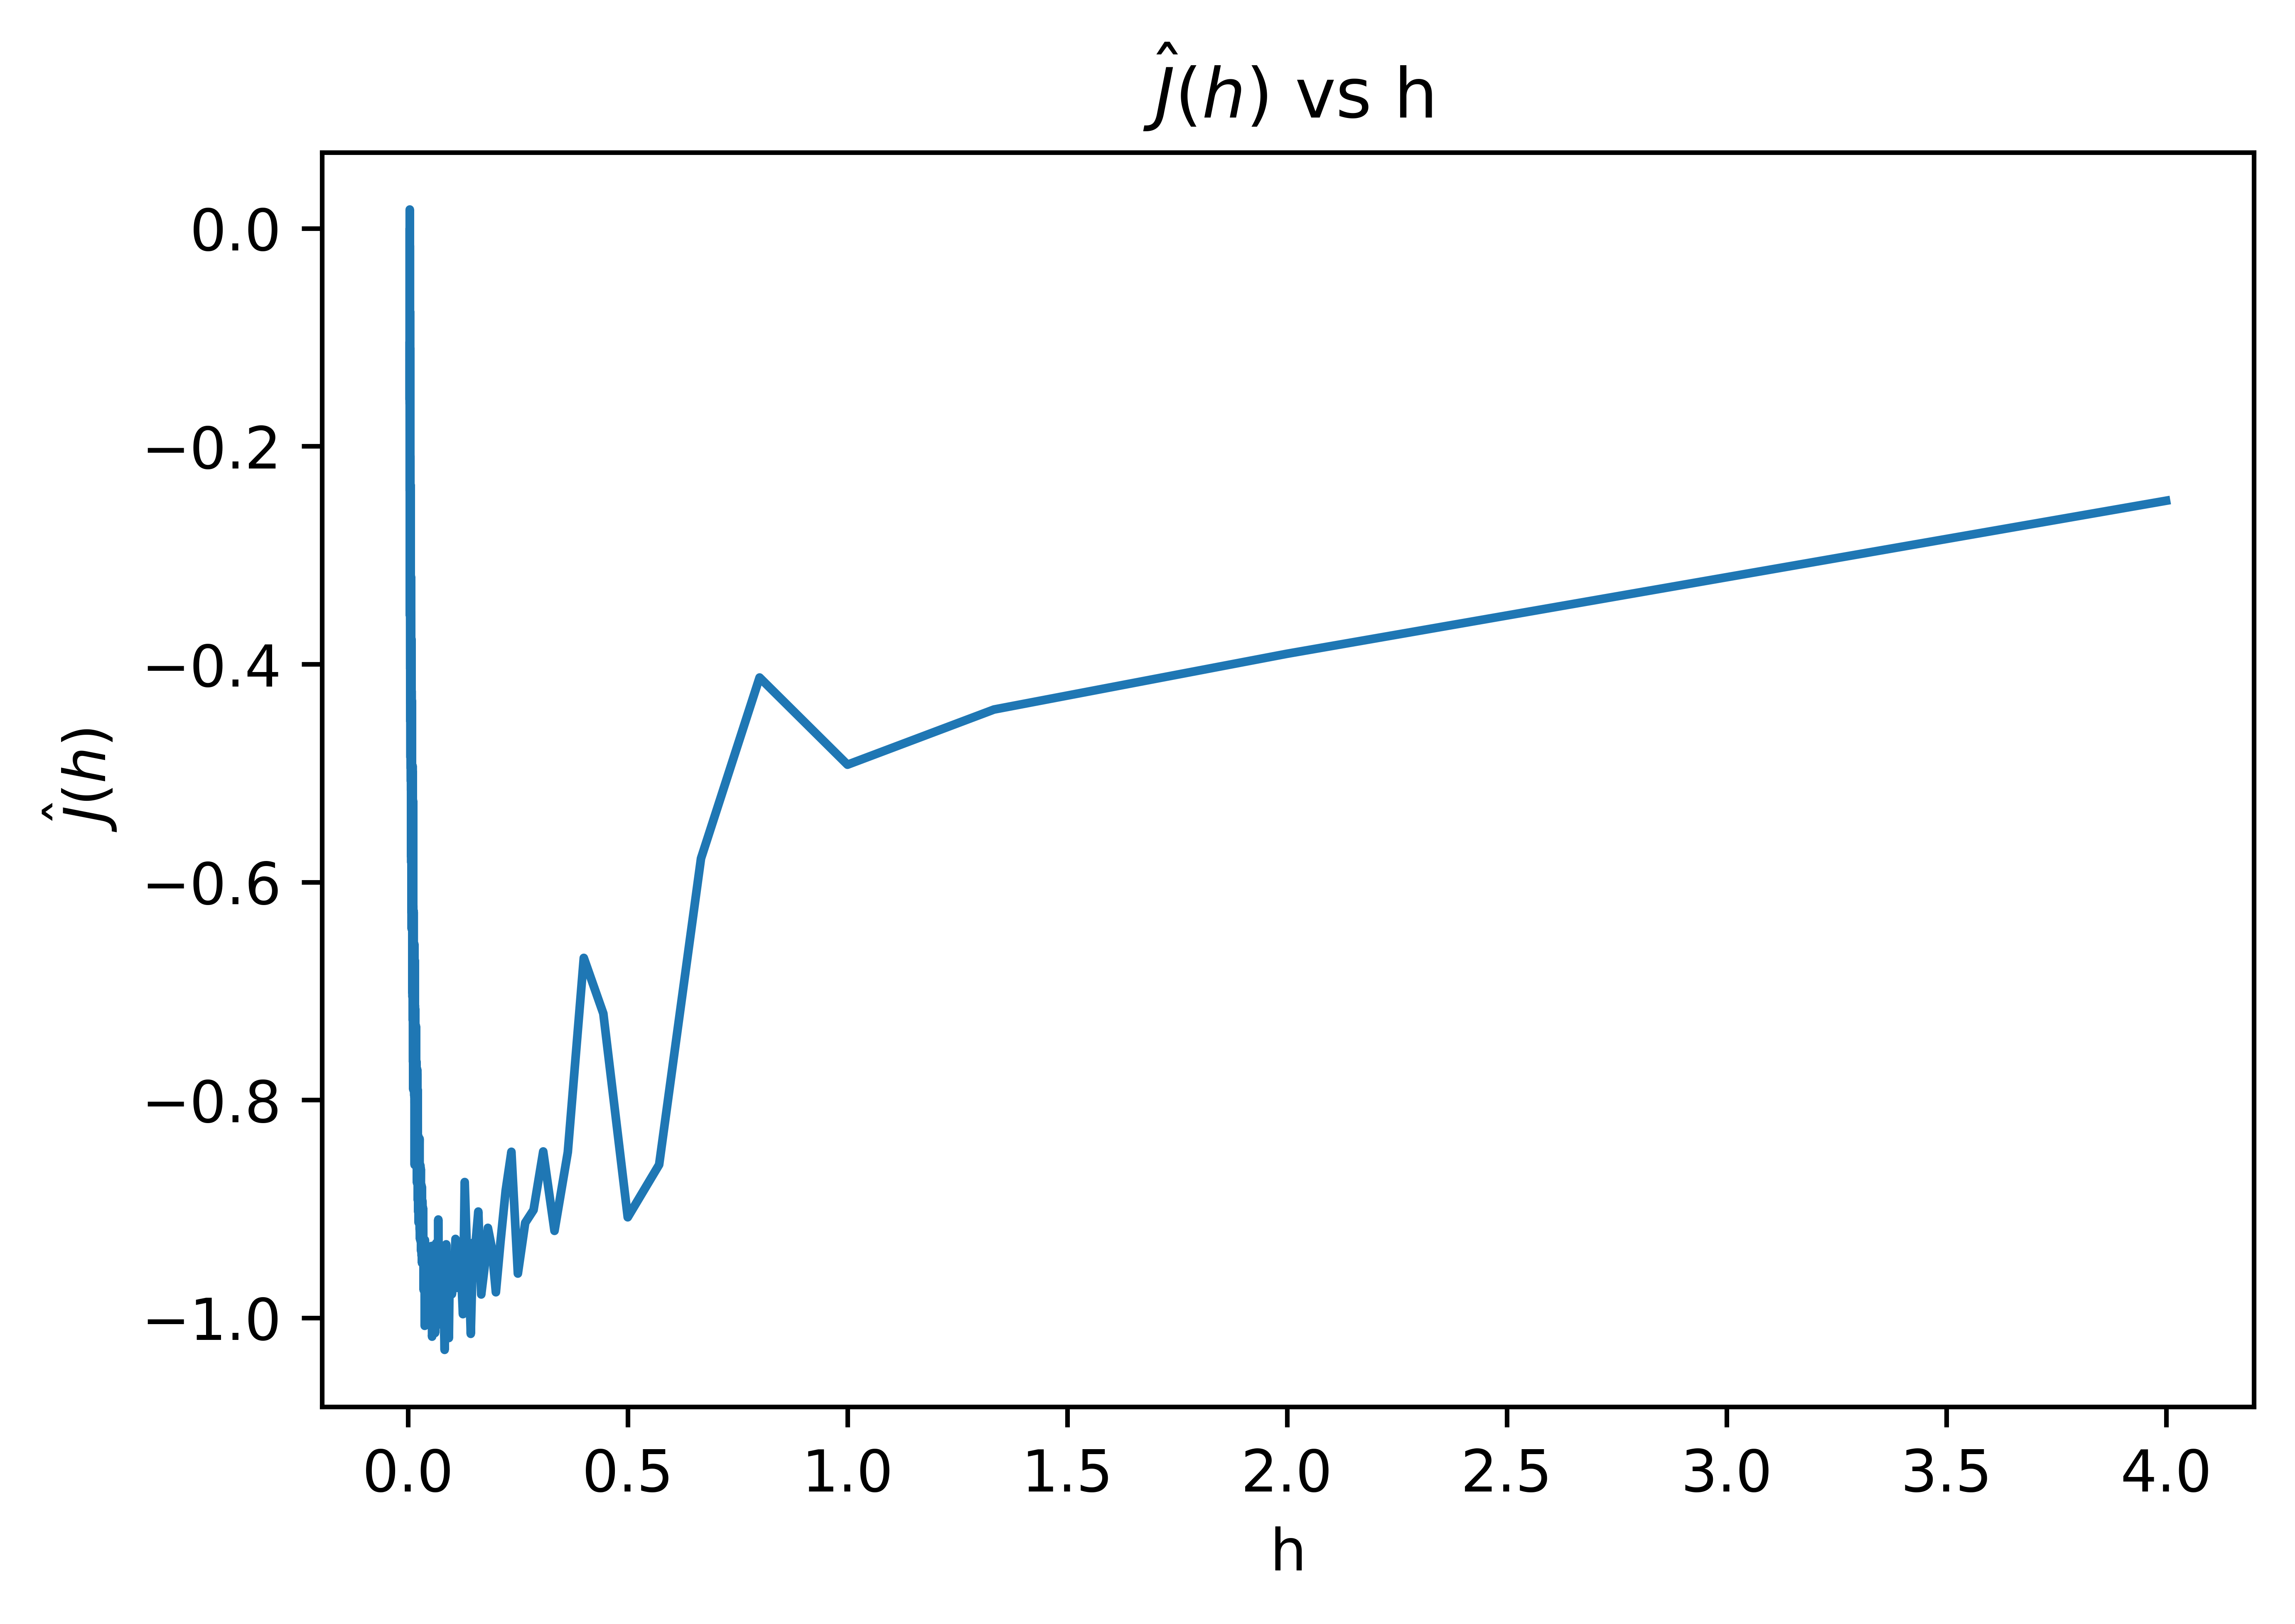

(47, 0.08333333333333333)

In [13]:
plt.figure(dpi=1000)
plt.plot(bin_widths, estimator)
# plt.plot(range(1, 1001), estimator)
title = r'\hat{J}(h)'
plt.title('$%s$'%title + ' vs h')
plt.xlabel('h')
plt.ylabel('$%s$'%title)
plt.show()
np.argmin(estimator), bin_widths[np.argmin(estimator)]

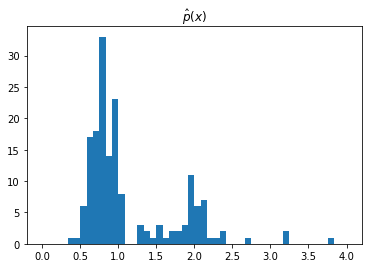

In [14]:
plt.hist(final_data, bins=np.argmin(estimator)+1, range=(0, 4))
title = r'\hat{p}(x)'
plt.title('$%s$'%title)
plt.show()

In [13]:
for i in p:
    print(round(i, 3), '&', end=' ')

0.015 & 0.956 & 0.809 & 0.132 & 0.279 & 0.25 & 0.015 & 0.0 & 0.029 & 0.015 & 

In [14]:
bins[1] - bins[0]

0.004